In [13]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
#Get the stock quote
nvda = pdr.DataReader('NVDA', data_source='yahoo', start='1980-01-01', end='2021-01-01')
nvda['return'] = nvda.Close.pct_change(1)
nvda

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-01-22,0.488281,0.388021,0.437500,0.410156,271468800.0,0.376735
1999-01-25,0.458333,0.410156,0.442708,0.453125,51048000.0,0.416203
1999-01-26,0.467448,0.411458,0.458333,0.417969,34320000.0,0.383912
1999-01-27,0.429688,0.395833,0.419271,0.416667,24436800.0,0.382716
1999-01-28,0.419271,0.412760,0.416667,0.415365,22752000.0,0.381520
...,...,...,...,...,...,...
2020-12-24,131.324997,129.387497,130.372498,129.937500,9788400.0,129.802017
2020-12-28,130.625000,127.632500,130.625000,129.000000,21256400.0,128.865479
2020-12-29,130.725006,128.422501,129.250000,129.432495,17037200.0,129.297501


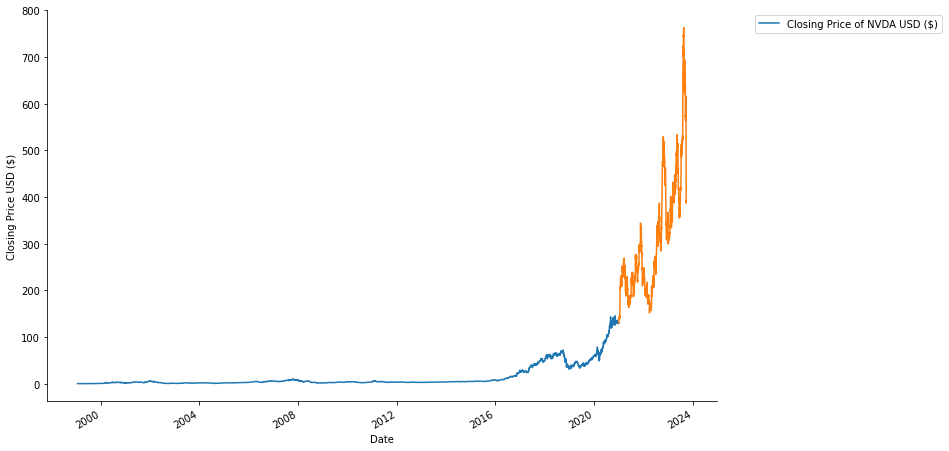

In [30]:
p0 = nvda.iloc[-1]['Close'] # final price of col Close
prices = [p0]
returns = nvda['return'].dropna()

# how many steps of simulation
for _ in range(1000): 
    
    # Generates a random sample from returns
    r = np.random.choice(returns) 
    
    # using the latest price to simulate a new price
    p = prices[-1] * (1 + r) 
    prices.append(p)
    
prices = pd.Series(prices)
prices.index = [nvda.index[-1] + datetime.timedelta(i) for i in range(len(prices))]

fig, ax = plt.subplots(figsize=(12,8))
nvda['Close'].plot()
prices.plot()

plt.legend(['Closing Price of NVDA USD ($)',],
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
sns.despine();